Column names: ['Shear Rate', 0.005, 0.01, 0.02]

Fitting models for Concentration 0.5%...
Power Law Parameters: k = 7.072207, n = 0.652107
Carreau-Yasuda Parameters: mu_inf = 0.000000, mu_0 = 126.155598, lambda = 10.061413, a = 0.331628, n = 0.000000

Performance Metrics:
Power Law Model:
  R²: 0.9676, MSE: 14.5549, MAE: 3.1651, Accuracy (20% margin): 37.70%
Carreau-Yasuda Model:
  R²: 0.9833, MSE: 7.4948, MAE: 1.3521, Accuracy (20% margin): 57.38%
Plot saved as viscosity_fit_0.5.png


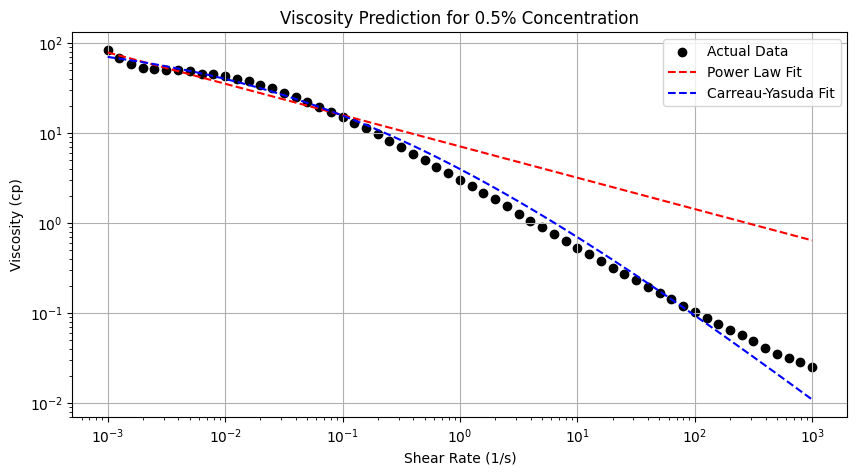


Fitting models for Concentration 1.0%...
Power Law Parameters: k = 31.422525, n = 0.687895
Carreau-Yasuda Parameters: mu_inf = 0.000000, mu_0 = 215.263740, lambda = 73.979526, a = 1.575416, n = 0.308265

Performance Metrics:
Power Law Model:
  R²: 0.9261, MSE: 448.0596, MAE: 17.1145, Accuracy (20% margin): 22.95%
Carreau-Yasuda Model:
  R²: 0.9990, MSE: 5.8938, MAE: 1.2226, Accuracy (20% margin): 60.66%
Plot saved as viscosity_fit_1.0.png


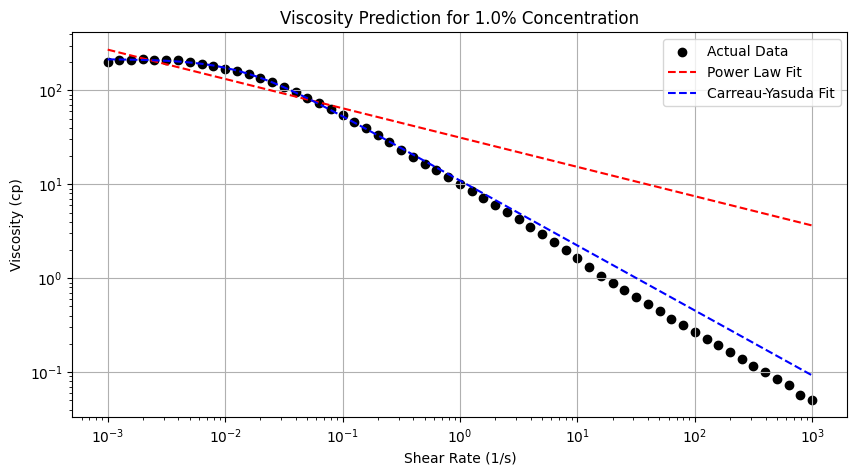


Fitting models for Concentration 2.0%...
Power Law Parameters: k = 90.643669, n = 0.626035
Carreau-Yasuda Parameters: mu_inf = 0.000000, mu_0 = 1403.544336, lambda = 33.836889, a = 0.523793, n = 0.000000

Performance Metrics:
Power Law Model:
  R²: 0.9668, MSE: 3430.7001, MAE: 47.2301, Accuracy (20% margin): 32.79%
Carreau-Yasuda Model:
  R²: 0.9898, MSE: 1055.1182, MAE: 13.7839, Accuracy (20% margin): 80.33%
Plot saved as viscosity_fit_2.0.png


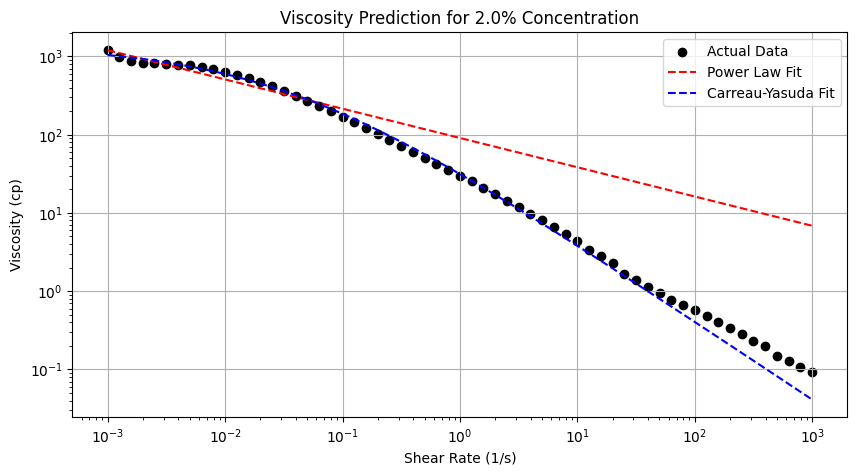

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the data
file_path = r'C:\Users\DELL\OneDrive\Documents\HPAM_viscosity.xlsx'  # Update with your actual path
data = pd.read_excel(file_path)

print("Column names:", data.columns.tolist())

# Extract shear rate
shear_rate = data['Shear Rate'].values
concentrations = [0.005, 0.01, 0.02]  # Update with actual concentration column names if different

# Power Law Model: mu = k * (shear_rate)^(n-1)
def power_law(shear_rate, k, n):
    return k * shear_rate**(n-1)

# Carreau-Yasuda Model: mu = mu_inf + (mu_0 - mu_inf) * (1 + (lambda * shear_rate)^a )^((n-1)/a)
def carreau_yasuda(shear_rate, mu_inf, mu_0, lamb, a, n):
    return mu_inf + (mu_0 - mu_inf) * (1 + (lamb * shear_rate)**a )**((n-1)/a)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    accuracy = np.mean(np.abs(y_true - y_pred) / np.maximum(y_true, 1e-8) <= 0.2) * 100  # Avoid zero-division
    return r2, mse, mae, accuracy

# Iterate over each concentration
for conc in concentrations:
    viscosity = data[conc].values
    
    print(f"\nFitting models for Concentration {conc*100:.1f}%...")
    
    # Fit Power Law Model
    try:
        popt_power, _ = curve_fit(power_law, shear_rate, viscosity, maxfev=5000)
        viscosity_pred_power = power_law(shear_rate, *popt_power)
        r2_power, mse_power, mae_power, acc_power = calculate_metrics(viscosity, viscosity_pred_power)
        print(f"Power Law Parameters: k = {popt_power[0]:.6f}, n = {popt_power[1]:.6f}")
    except Exception as e:
        print(f"Power Law fitting failed: {e}")
        popt_power, r2_power, mse_power, mae_power, acc_power = [None]*5

    # Fit Carreau-Yasuda Model
    try:
        init_params = [np.min(viscosity), np.max(viscosity), 1, 1, 0.5]
        bounds = ([0, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])
        popt_carreau, _ = curve_fit(carreau_yasuda, shear_rate, viscosity, p0=init_params, bounds=bounds, maxfev=5000)
        viscosity_pred_carreau = carreau_yasuda(shear_rate, *popt_carreau)
        r2_carreau, mse_carreau, mae_carreau, acc_carreau = calculate_metrics(viscosity, viscosity_pred_carreau)
        print(f"Carreau-Yasuda Parameters: mu_inf = {popt_carreau[0]:.6f}, mu_0 = {popt_carreau[1]:.6f}, "
              f"lambda = {popt_carreau[2]:.6f}, a = {popt_carreau[3]:.6f}, n = {popt_carreau[4]:.6f}")
    except Exception as e:
        print(f"Carreau-Yasuda fitting failed: {e}")
        popt_carreau, r2_carreau, mse_carreau, mae_carreau, acc_carreau = [None]*5

    # Print results
    print("\nPerformance Metrics:")
    if popt_power is not None:
        print("Power Law Model:")
        print(f"  R²: {r2_power:.4f}, MSE: {mse_power:.4f}, MAE: {mae_power:.4f}, Accuracy (20% margin): {acc_power:.2f}%")
    if popt_carreau is not None:
        print("Carreau-Yasuda Model:")
        print(f"  R²: {r2_carreau:.4f}, MSE: {mse_carreau:.4f}, MAE: {mae_carreau:.4f}, Accuracy (20% margin): {acc_carreau:.2f}%")

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 5))
    plt.scatter(shear_rate, viscosity, label="Actual Data", color='black')
    if popt_power is not None:
        plt.plot(shear_rate, viscosity_pred_power, label="Power Law Fit", linestyle="--", color='red')
    if popt_carreau is not None:
        plt.plot(shear_rate, viscosity_pred_carreau, label="Carreau-Yasuda Fit", linestyle="--", color='blue')
    plt.xlabel("Shear Rate (1/s)")
    plt.ylabel("Viscosity (cp)")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
    plt.title(f"Viscosity Prediction for {conc*100:.1f}% Concentration")
    plt.grid(True)
    
    # Save figure
    save_path = f"viscosity_fit_{conc*100:.1f}.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Plot saved as {save_path}")
    
    plt.show()
